Berdasarkan pada persamaan yang berasal dari paper didapati matriks untuk melihat perubahan aktivitas yang terjadi:

$$\begin{pmatrix}Bf(t+\Delta t)\\Bs(t+\Delta t)\\P(t+\Delta t)\\L(t+\Delta t)\\Hw(t+\Delta t)\\K(t+\Delta t)\\Llf(t+\Delta t)\\Of(t+\Delta t)\\Os(t+\Delta t)\\E(t+\Delta t)\\\end{pmatrix}=\begin{pmatrix}1-k4\Delta t -k5\Delta t & k6\Delta t &k3\Delta t & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \\k5\Delta t & 1-k6\Delta t & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & k7\Delta t & 1-k8\Delta t & 0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & k9\Delta t & 0 & 1-k10\Delta t & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & k11\Delta t & 0 & 0 & 1 -k12\Delta t & 0 & 0 & 0 & 0 & 0\\0 & 0 & K13\Delta t & 0 & 0 & 0 & 1-k14\Delta t-k15\Delta t & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & k15\Delta t & 1 & 0 & 0 & 0\\0 & 0 & k16\Delta t & 0 & 0 & 0 & 0 & 0 & 1-k17\Delta t-k18\Delta t & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & k18\Delta t & 1 & 0\\k4\Delta t & 0 & 1-k1\Delta t-k3\Delta t-k7\Delta t-k9\Delta t-k11\Delta t-k13\Delta t-k16\Delta t & k8\Delta t & k10\Delta t & k12 \Delta t & k14\Delta t & 0 & k17\Delta t & 0 & k2\Delta t\\0 & 0 & k1\Delta t & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1-k2\Delta t\\\end{pmatrix} \times \begin{pmatrix}Bf(t)\\Bs(t)\\P(t)\\L(t)\\Hw(t)\\K(t)\\Llf(t)\\Lls(t)\\Of(t)\\Os(t)\\E(t)\\\end{pmatrix}$$

Buat pake yang kayak kemarin, belum yang pake matriks

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib
matplotlib.style.use('classic')

In [15]:
def rate_of_change(B_f,B_s,L,HW,K,Ll_f,Ll_s,O_f,O_s,P,E,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15,k16,k17,k18):
    dB_f = -(k4+k5) *B_f + k6 * B_s + k3 * P
    dB_s = -k6 * B_s + k5 * B_f
    dL = -k8 * L + k7 * P
    dHW = -k10 * HW + k9 * P
    dK = -k12 * K + k11 * P
    dLl_f = -(k14+k15) * Ll_f + k13 * P
    dLl_s = k15 * Ll_f
    dO_f = -(k17+k18) * O_f + k16 * P
    dO_s = k18 * O_f
    dP = -(k1+k3+k7+k9+k11+k13+k16 ) * P +k2 * E + k4 * B_f + k8 * L + k10 * HW + k12 * K + k14 * Ll_f + k17 * O_f
    dE = -k2 * E + k1 * P
    return dB_f,dB_s,dL,dHW,dK,dLl_f,dLl_s,dO_f,dO_s,dP,dE

In [16]:
# Definisikan variabel
N_B_f0 = 0
N_B_s0 = 0
N_L0 = 0
N_HW0 = 0 
N_K0 = 0
N_Ll_f0 = 0
N_Ll_s0 = 0
N_O_f0 = 0
N_O_s0 = 0
N_P0 = 100
N_E0 = 0
k1 = 5.82e-2 * 0.01
k2= 1.16e-1 * 0.01
k3 = 6.12e-2 * 0.01
k4 = 1.30e-2* 0.01
k5 = 6.62e-2* 0.01
k6 = 9.57e-4* 0.01
k7 = 7.2e-4* 0.01
k8 = 6.46e-4* 0.01
k9 = 1.72e-4* 0.01
k10 = 1.16e-7* 0.01
k11 = 7.57e-4* 0.01
k12 = 2.26e-2* 0.01
k13 = 1.72e-2* 0.01
k14 = 2.19e-2* 0.01
k15 = 1.2e-6* 0.01
k16 = 1.32* 0.01
k17 = 2.76* 0.01
k18 = 3.62e-3* 0.01
dt = 0.01
t = 300 * 60
t_half = 110 * 60

In [17]:
 #Buat dulu array yang menampung nilai-nilai yang kita inginkan
def propagate(B_f,B_s,L,HW,K,Ll_f,Ll_s,O_f,O_s,P,E,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15,k16,k17,k18,dt):
    dB_f,dB_s,dL,dHW,dK,dLl_f,dLl_s,dO_f,dO_s,dP,dE = rate_of_change(B_f,B_s,L,HW,K,Ll_f,Ll_s,O_f,O_s,P,E,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15,k16,k17,k18)
    N_B_f_t = B_f + dB_f * dt
    N_B_s_t = B_s + dB_s * dt
    N_L_t = L + dL * dt
    N_HW_t = HW + dHW * dt
    N_K_t = K + dK * dt
    N_Ll_f_t = Ll_f + dLl_f * dt
    N_Ll_s_t = Ll_s + dLl_s * dt
    N_O_f_t = O_f + dO_f * dt
    N_O_s_t = O_s + dO_s * dt
    N_P_t = P + dP * dt
    N_E_t = E + dE * dt
    return N_B_f_t,N_B_s_t,N_L_t,N_HW_t,N_K_t,N_Ll_f_t,N_Ll_s_t,N_O_f_t,N_O_s_t,N_P_t,N_E_t

In [18]:
time = np.linspace(0,t,int(t/dt)+1)

In [19]:
Ns = np.zeros((11,int(t/dt)+1))

In [20]:
Ns[:,0] = N_B_f0,N_B_s0,N_L0,N_HW0,N_K0,N_Ll_f0,N_Ll_s0,N_O_f0,N_O_s0,N_P0,N_E0

In [21]:
for i in range(int(t/dt)):
    Ns[:,i+1] = propagate(Ns[0,i],Ns[1,i],Ns[2,i],Ns[3,i],Ns[4,i],Ns[5,i],Ns[6,i],Ns[7,i],Ns[8,i],Ns[9,i],Ns[10,i],k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15,k16,k17,k18,dt)

In [22]:
Ns_adj = np.zeros((11,int(t/dt)+1))

In [23]:
for i in range(int(t/dt)+1):
    Ns_adj[:,i] = Ns[:,i] * (1/2)**((i*dt)/t_half)

Text(0.5, 0, 'time')

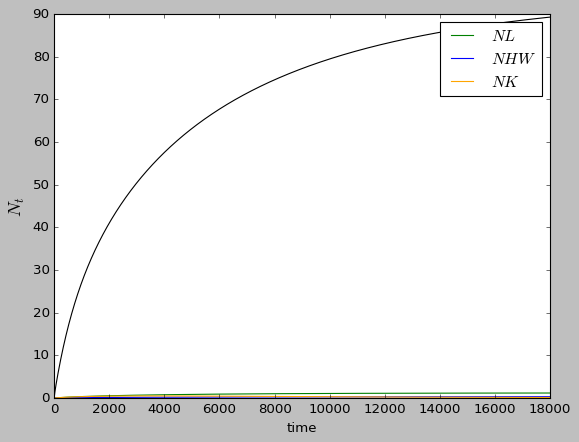

In [24]:
fig = plt.figure(figsize=(8,6))
#fastbrain
#plt.plot(time,Ns[0,:],color='red')
#slowbrain
#plt.plot(time,Ns[1,:],color='red')
#lungs
plt.plot(time,Ns[2,:],color='green')
#heartwall
plt.plot(time,Ns[3,:],color='blue')
#kidney
plt.plot(time,Ns[4,:],color='orange')
#fastliver
#plt.plot(time,Ns[5,:])
#slowliver
#plt.plot(time,Ns[6,:])
#fastothercompartment
#plt.plot(time,Ns[7,:])
#slow other compertment
#plt.plot(time,Ns[8,:])
#plasma
#plt.plot(time,Ns[9,:])
#erythrocytes
#plt.plot(time,Ns[10,:])
#Otak gabungan 
plt.plot(time,Ns[0,:]+Ns[1,:],color='black')
#plt.legend(('$NB_f$','$NB_s$','$NL$','$NHW$', '$NK$','$NLl_f$','$NLl_s$','$NO_f$','$NO_s$','$NP$','$NE$'))
plt.legend(('$NL$','$NHW$', '$NK$'))
plt.ylabel('$N_t$',fontsize=16)
plt.xlabel('time')

NameError: name 'df' is not defined

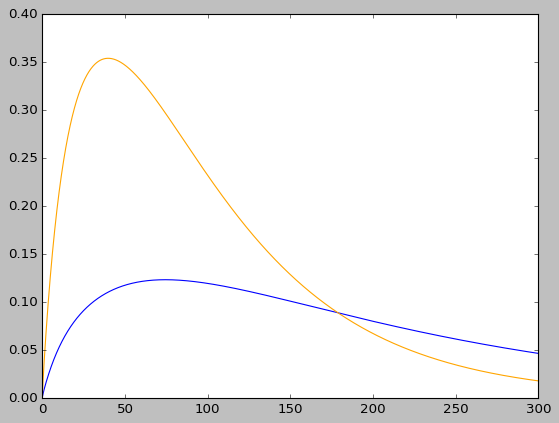

In [25]:
fig = plt.figure(figsize=(8,6))
#fastbrain
#plt.plot(time/60,(Ns_adj[0,:])*12/18,color='red') #dikali 12/18 untuk normalisasi
#slowbrain
#plt.plot(time/60,(Ns_adj[1,:])*12/35,color='purple') #dikali 12/35 untuk normalisasi
#lungs
#plt.plot(time/60,(Ns_adj[2,:])*1.8/0.6,color='green')
#heartwall
plt.plot(time/60,(Ns_adj[3,:]),color='blue')
#kidney
plt.plot(time/60,(Ns_adj[4,:]),color='orange') 
#fastliver
#plt.plot(time/60,Ns_adj[5,:])
#slowliver
#plt.plot(time/60,Ns_adj[6,:])
#fastothercompartment
#plt.plot(time/60,Ns_adj[7,:])
#slow other compertment
#plt.plot(time/60,Ns_adj[8,:])
#plasma
#plt.plot(time/60,Ns_adj[9,:])
#erythrocytes
#plt.plot(time/60,Ns_adj[10,:])
#gabungan brain
#plt.plot(time/60,(Ns_adj[0,:]+Ns_adj[1,:])*12/40,color='black')
#plt.legend(('$NB_f$','$NB_s$','$NL$','$NHW$', '$NK$','$NLl_f$','$NLl_s$','$NO_f$','$NO_s$','$NP$','$NE$'))
plt.plot(df['xhw'],df['yhw']*100, 'o') #data
plt.legend(('$HW_S$','$HW_d$','$NK$', '$NK$'))
plt.ylabel('$N_t$',fontsize=16)
plt.xlabel('time')

In [ ]:
N_sum = Ns.sum(axis=0)
print(N_sum)


[100. 100. 100. ... 100. 100. 100.]


In [ ]:
N_sum1 = Ns_adj.sum(axis=0)
print(N_sum1)

[100.          99.99989498  99.99978996 ...  15.10114977  15.10113391
  15.10111806]


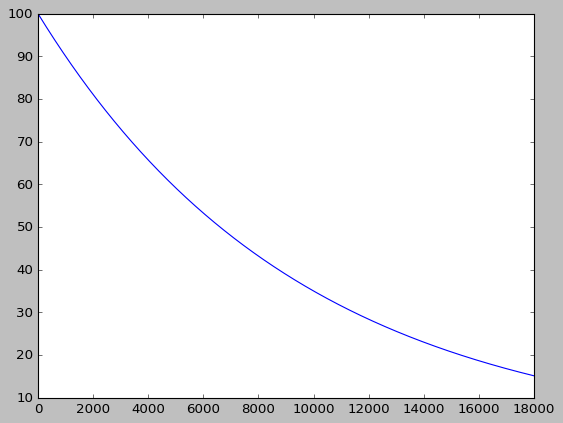

In [ ]:
plt.plot(time,N_sum1)

In [ ]:
Ns[0]

array([0.00000000e+00, 6.12000000e-04, 1.22390591e-03, ...,
       2.50906364e+00, 2.50906205e+00, 2.50906046e+00])

In [ ]:
Ns[1]

array([0.00000000e+00, 0.00000000e+00, 4.05144000e-09, ...,
       8.67650651e+01, 8.67650734e+01, 8.67650817e+01])

In [ ]:
Ns[0+1]

array([0.00000000e+00, 0.00000000e+00, 4.05144000e-09, ...,
       8.67650651e+01, 8.67650734e+01, 8.67650817e+01])

In [ ]:
Ns[0]+Ns[1]

array([0.00000000e+00, 6.12000000e-04, 1.22390996e-03, ...,
       8.92741288e+01, 8.92741355e+01, 8.92741422e+01])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('Data plotting paper.xlsx', sheet_name='Sheet1')

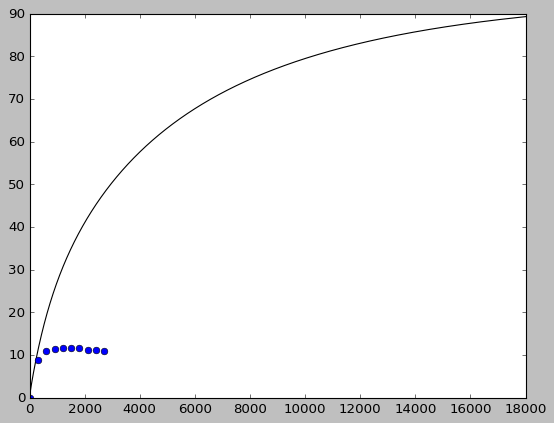

In [ ]:
plt.plot(time,Ns[0,:]+Ns[1,:],color='black')
plt.plot(df['xb']*60,df['yb']*100, 'o')